## 12.1 immer 설치 & 사용법
- 폼에서 아이디 / 이름 입력하면 하단 리스트에 추가되고, 항목 클릭하면 삭제되는 컴포넌트
```js
import React, { useRef, useCallback, useState } from 'react';

const App = () => {
  const nextId = useRef(1);
  const [form, setForm] = useState({ name: '', username: '' });
  const [data, setData] = useState({
    array: [],
    uselessValue: null
  });

  // input 수정을 위한 함수
  const onChange = useCallback(e => {
    const { name, value } = e.target;
    setForm({
      ...form,
      [name]:[value]
    });
  }, [form]);

  // form 등록을 위한 함수
  const onSubmit = useCallback(
    e => {
      e.preventDefault();
      const info = {
        id: nextId.current,
        name: form.name,
        username: form.username
      };

      // array 에 새 항목 등록
      setData({
        ...data,
        array:data.array.concat(info)
      });

      // form 초기화
      setForm({
        name: '',
        username: ''
      });
      nextId.current += 1;
    },
    [data, form.name, form.username]
  );

  // 항목을 삭제하는 함수
  const onRemove = useCallback(
    id => {
      setData({
        ...data,
        array:data.array.filter(info => info.id !== id)
      });
    },
    [data]
  );

  return (
    <div>
      <form onSubmit={onSubmit}>
        <input
          name="username"
          placeholder="아이디"
          value={form.username}
          onChange={onChange}
        />
        <input
          name="name"
          placeholder="이름"
          value={form.name}
          onChange={onChange}
        />
        <button type="submit">등록</button>
      </form>
      <div>
        <ul>
          {data.array.map(info => (
            <li key={info.id} onClick={() => onRemove(info.id)}>
              {info.username} ({info.name})
            </li>
          ))}
        </ul>
      </div>
    </div>
  );
};

export default App;
```
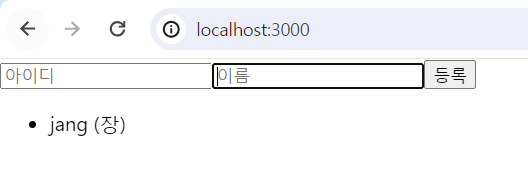

### immer 사용법
- immer를 사용하면 불변성을 유지하는 작업을 간단하게 처리할 수 있다.
```js
import produce from 'immer'
const nextState = produce(originalState, draft => {
    // 바꾸고 싶은 값 바꾸기
    draft.somewhere.deep.inside = 5
})
```
- produce라는 함수는 두 가지 파라미터를 받는다.
    - 첫 번째 파라미터는 수정하고 싶은 상태
    - 두 번째 파라미터는 상태를 어떻게 업데이트할지를 정의하는 함수
        - 함수 내부에서 원하는 값을 변경하면 produce 함수가 불변성을 유지를 대신해 주면서 새로운 상태를 생성해준다.

- immer은 불변성에 신경 쓰지 않는 것처럼 코드를 작성하되 불변성 관리는 제대로 해준다.
- App 컴포넌트 immer 적용해 수정
  ```js
  import React, { useRef, useCallback, useState } from 'react';
  import {produce} from 'immer';

  const App = () => {
    const nextId = useRef(1);
    const [form, setForm] = useState({ name: '', username: '' });
    const [data, setData] = useState({
      array: [],
      uselessValue: null
    });

    // input 수정을 위한 함수
    const onChange = useCallback(e => {
      const { name, value } = e.target;
      setForm(
        produce(draft => {
          draft[name] = value;
        })
      );
    }, []);

    // form 등록을 위한 함수
    const onSubmit = useCallback(
      e => {
        e.preventDefault();
        const info = {
          id: nextId.current,
          name: form.name,
          username: form.username
        };

        // array 에 새 항목 등록
        setData(
          produce(draft => {
            draft.array.push(info);
          })
        );

        // form 초기화
        setForm({
          name: '',
          username: ''
        });
        nextId.current += 1;
      },
      [form.name, form.username]
    );

    // 항목을 삭제하는 함수
    const onRemove = useCallback(
      id => {
        setData(
          produce(draft => {
            draft.array.splice(draft.array.findIndex(info => info.id === id), 1);
          })
        );
      },
      []
    );

    return (
      <div>
        <form onSubmit={onSubmit}>
          <input
            name="username"
            placeholder="아이디"
            value={form.username}
            onChange={onChange}
          />
          <input
            name="name"
            placeholder="이름"
            value={form.name}
            onChange={onChange}
          />
          <button type="submit">등록</button>
        </form>
        <div>
          <ul>
            {data.array.map(info => (
              <li key={info.id} onClick={() => onRemove(info.id)}>
                {info.username} ({info.name})
              </li>
            ))}
          </ul>
        </div>
      </div>
    );
  };

  export default App;
  ```


## 12.2 정리
- 컴포넌트의 상태 업데이트가 까다로울 때 사용하기 좋은 라이브러리 immer
- 편의를 위한 것이므로 꼭 필요하지는 않지만, 생산성을 크게 높일 수 있다.